In [1]:
from random import random, randrange
import numpy as np
import matplotlib.pyplot as plt
import json, csv
import networkx as nx

In [2]:
def cluster_coeff():
    edges = {}
    neighbors = {}
    coeffs = {}
    with open('edges.csv') as edgesfile:
        csvreader = csv.reader(edgesfile)
        header = next(csvreader)
        #print(header)
        for row in csvreader:
            if row[0] == row[1]:
                continue
            if row[0] not in edges.keys():
                edges[row[0]] = []
                coeffs[row[0]] = []
                neighbors[row[0]] = []
            if row[1] not in edges.keys():
                edges[row[1]] = []
                coeffs[row[1]] = []
                neighbors[row[1]] = []
            if row[1] not in edges[row[0]]:
                edges[row[0]].append(row[1])
                neighbors[row[0]].append(row[1])
                if row[0] not in neighbors[row[1]]:
                    neighbors[row[1]].append(row[0])

    for nodei in edges.keys():
        neighboredges = 0
        k = len(neighbors[nodei])
        for nodej in neighbors[nodei]:
            for nodek in neighbors[nodei]:
                if nodek in edges[nodej]:
                    neighboredges += 1
        if k > 1:
            coeffs[nodei] = neighboredges/k/(k-1)
        else:
            coeffs[nodei] = 0
    
    #global_cluster = 0
    #total_users = 0
    #total_fraudsters =0
    #for key, coeff in coeffs.items():
    #    total_users += 1
    #    global_cluster += coeff
    #    if ground_truth[key] == 1:
    #        total_fraudsters += 1
    #global_cluster = global_cluster/total_users
    #fraudpercent = total_fraudsters/total_users
    return coeffs

In [3]:
def weighted_cluster_coeff():
    edges = {}
    neighbors = {}
    weights = {}
    coeffs = {}
    with open('edges.csv') as edgesfile:
        csvreader = csv.reader(edgesfile)
        header = next(csvreader)
        #print(header)
        for row in csvreader:
            if (row[1] == row[0]):
                continue
            if (row[0],row[1]) not in weights.keys():
                weights[(row[0],row[1])] = 1
            if (row[1],row[0]) not in weights.keys():
                weights[(row[1],row[0])] = 1
            if row[0] not in edges.keys():
                edges[row[0]] = []
                coeffs[row[0]] = []
            if row[1] not in edges.keys():
                edges[row[1]] = []
                coeffs[row[1]] = []
            if row[1] not in edges[row[0]]:
                edges[row[0]].append(row[1])
            else:
                weights[(row[0],row[1])] += 1
            if row[0] not in edges[row[1]]:
                edges[row[1]].append(row[0])
            else:
                weights[(row[1],row[0])] += 1

    for nodei in edges.keys():
        neighboredges = 0
        k = len(edges[nodei])
        s = 0
        for nodej in edges[nodei]:
            s += weights[(nodei,nodej)]
            for nodek in edges[nodei]:
                if nodek in edges[nodej] and nodek != nodei:
                    neighboredges += weights[(nodei,nodek)] + weights[(nodei,nodej)]
        if k > 1:
            coeffs[nodei] = neighboredges/2/s/(k-1)
        else:
            coeffs[nodei] = 0
            
    #global_cluster = 0
    #total_users = 0
    #total_fraudsters =0
    #for key, coeff in coeffs.items():
    #    total_users += 1
    #    global_cluster += coeff
    #    if ground_truth[key] == 1:
    #        total_fraudsters += 1
    #global_cluster = global_cluster/total_users
    #fraudpercent = total_fraudsters/total_users
    
    return coeffs

In [4]:
def fillGraph(G, filename):
    with open(filename) as edgesfile:
        csvreader = csv.reader(edgesfile)
        header = next(csvreader)
        #print(header)
        for row in csvreader:
            G.add_edge(row[0], row[1])
    
    return G

In [5]:
#cc = cluster_coeff()
#print("clustering coefficients found")
#wcc = weighted_cluster_coeff()
#print("weighted clustering coefficients found")
G = nx.DiGraph()
G = fillGraph(G, 'edges.csv')
pr = nx.pagerank(G)
dg = dict(nx.degree(G))
nxcc = nx.clustering(G)
print("clustering pageRank and degree found")
users = {}
for key, value in pr.items():
    #users[key] = [value]
    users[key] = [nxcc[key]]
    users[key].append(dg[key])
    users[key].append(pr[key])
print(len(users))

clustering pageRank and degree found
115869


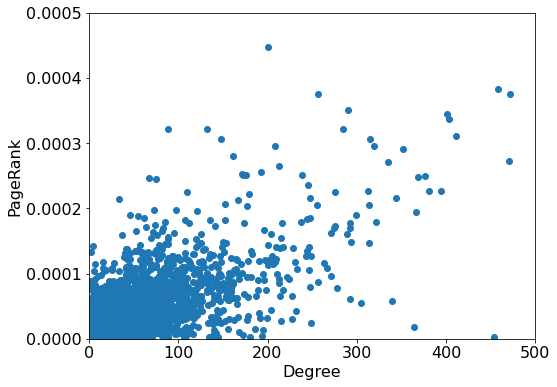

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (8,6)  # in inches
rcParams['font.size'] = 16

labels = ["Clustering Coefficient", "Degree","PageRank"]
ind1 = 1
ind2 = 2
plt.scatter([value[ind1] for value in users.values()], [value[ind2] for value in users.values()])
plt.xlabel(labels[ind1])
plt.ylabel(labels[ind2])
plt.ylim([0, 0.0005])
plt.xlim([0, 500])
plt.show()

In [7]:
print(len(users))

115869
